In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("AIDS_ClinicalTrial_GroupStudy175.csv")


Saving AIDS_ClinicalTrial_GroupStudy175.csv to AIDS_ClinicalTrial_GroupStudy175 (1).csv


In [ ]:
df.head(15) # 2000+ row

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,...,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,...,1,3,0,0,0,244,225,708,699,1
7,957,0,41,66.2256,0,1,1,100,0,1,...,1,3,0,0,0,401,366,889,720,0
8,198,3,40,82.5552,0,1,0,90,0,1,...,1,3,1,1,1,214,107,652,131,1
9,188,0,35,78.0192,0,1,0,100,0,1,...,1,3,0,0,1,221,132,221,759,1


In [ ]:
print(df.info())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

In [ ]:
df.isnull().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


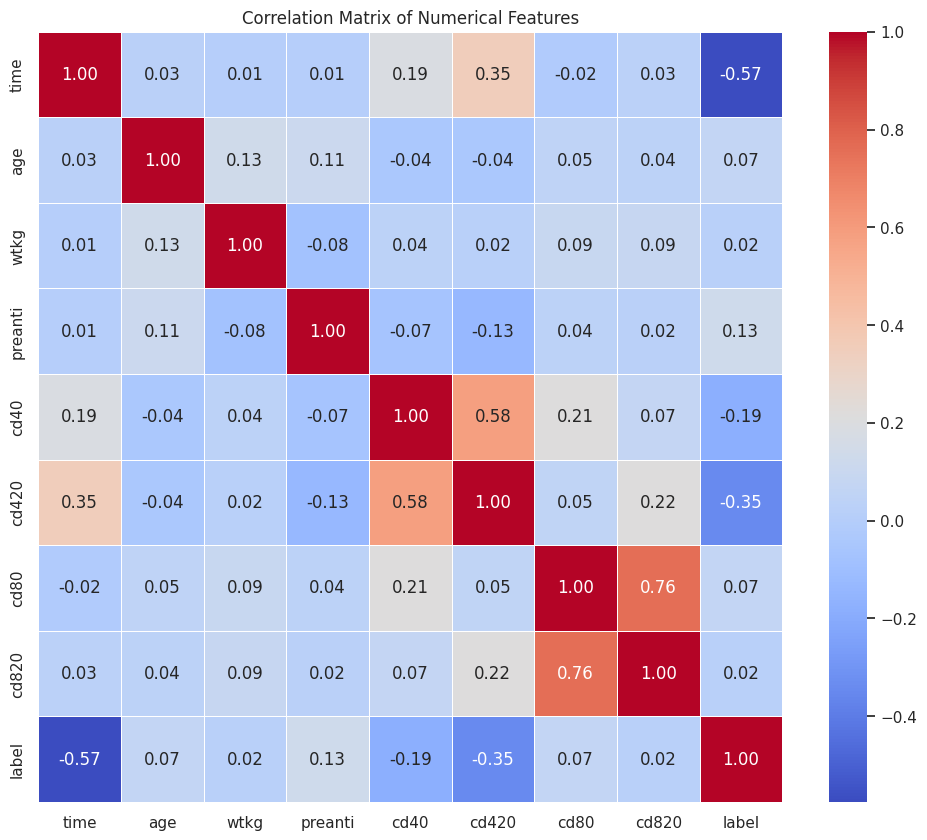

In [ ]:
plt.figure(figsize=(12, 10))
corr = df[num_cols + ['label']].corr()  # Focus on numerical columns + target
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [ ]:

# Categorical: Unique values < 20 (adjust threshold as needed)
cat_cols = [col for col in df.columns if df[col].nunique() < 20 and col != 'label']

# Numeric: The rest (excluding 'label')
num_cols = [col for col in df.columns if col not in cat_cols + ['label']]

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

Categorical: ['trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'zprior', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt']
Numeric: ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']


In [ ]:
cat_cols = ['trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'zprior',
            'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt']
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
print(df.dtypes)

time          int64
trt        category
age           int64
wtkg        float64
hemo       category
homo       category
drugs      category
karnof     category
oprior     category
z30        category
zprior     category
preanti       int64
race       category
gender     category
str2       category
strat      category
symptom    category
treat      category
offtrt     category
cd40          int64
cd420         int64
cd80          int64
cd820         int64
label         int64
dtype: object


In [ ]:
column_definitions = {
    # Treatment Groups (critical)
    'trt': {
        0: "Placebo",
        1: "Zidovudine (AZT) Monotherapy",
        2: "Zidovudine + Didanosine",
        3: "Zidovudine + Zalcitabine"
    },

    # Clinical Status (essential)
    'karnof': {
        range(0,40): "Disabled",
        range(40,70): "Requires assistance",
        range(70,100): "Ambulatory",
        100: "Normal activity"
    },

    # Symptoms (important)
    'symptom': {
        0: "Asymptomatic",
        1: "Symptomatic (fever, weight loss, etc.)"
    },

    # Drug Use History (key confounder)
    'drugs': {
        0: "Naive",
        1: "Previous ART experience"
    },

    # CD4 Categories (derived from cd40)
    'cd4_category': {
        0: "<200 (AIDS-defining)",
        1: "200-500 (Moderate immunosuppression)",
        2: ">500 (Mild immunosuppression)"
    }
}

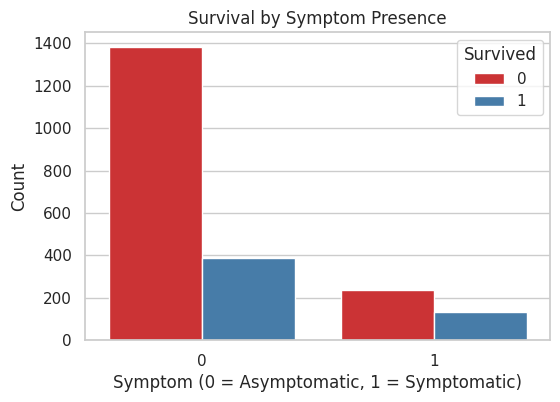

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='symptom', hue='label', data=df, palette='Set1')
plt.title("Survival by Symptom Presence")
plt.xlabel("Symptom (0 = Asymptomatic, 1 = Symptomatic)")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

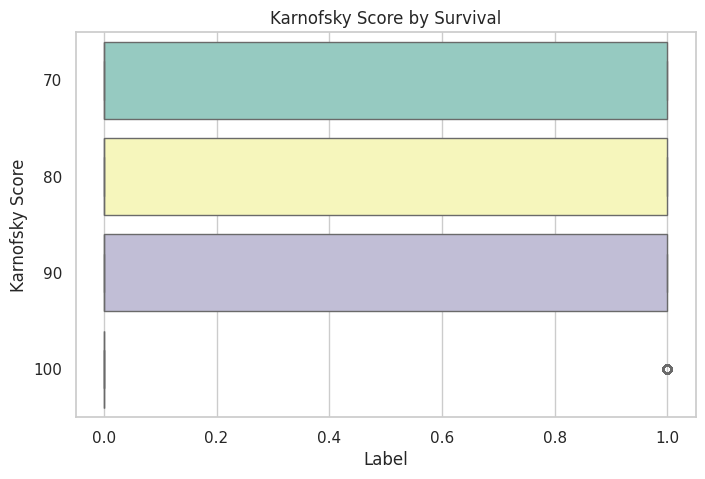

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='karnof', data=df, palette='Set3')
plt.title("Karnofsky Score by Survival")
plt.xlabel("Label")
plt.ylabel("Karnofsky Score")
plt.show()


In [ ]:
# 1. Create medically-grounded categories
cd4_bins = [-1, 200, 350, 500, float('inf')]
cd4_labels = [
    "Critical (<200)",
    "Advanced (200-350)",
    "Mild (350-500)",
    "Normal (>500)"
]

df['cd4_category'] = pd.cut(
    df['cd40'],
    bins=cd4_bins,
    labels=cd4_labels
).astype('category')

# 2. Handle CD4=0 as special case (if biologically valid)
if (df['cd40'] == 0).any():
    df['cd4_emergency'] = (df['cd40'] <= 200).astype(int)  # Binary flag

# 3. Validate distribution
print("CD4 Category Distribution:")
print(df['cd4_category'].value_counts().sort_index())

if 'cd4_emergency' in df:
    print(f"\nPatients in emergency range (CD4<=200): {df['cd4_emergency'].sum()}")

CD4 Category Distribution:
cd4_category
Critical (<200)       173
Advanced (200-350)    977
Mild (350-500)        776
Normal (>500)         213
Name: count, dtype: int64

Patients in emergency range (CD4<=200): 173


In [ ]:
pd.crosstab(df['cd4_category'], df['label'], normalize='index')

label,0,1
cd4_category,,
Critical (<200),0.502890,0.497110
Advanced (200-350),0.724667,0.275333
Mild (350-500),0.824742,0.175258
Normal (>500),0.859155,0.140845


<Axes: xlabel='label', ylabel='cd40'>

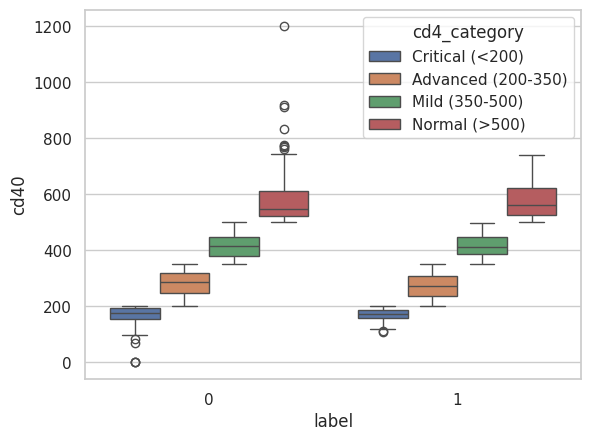

In [ ]:
sns.boxplot(x='label', y='cd40', hue='cd4_category', data=df)


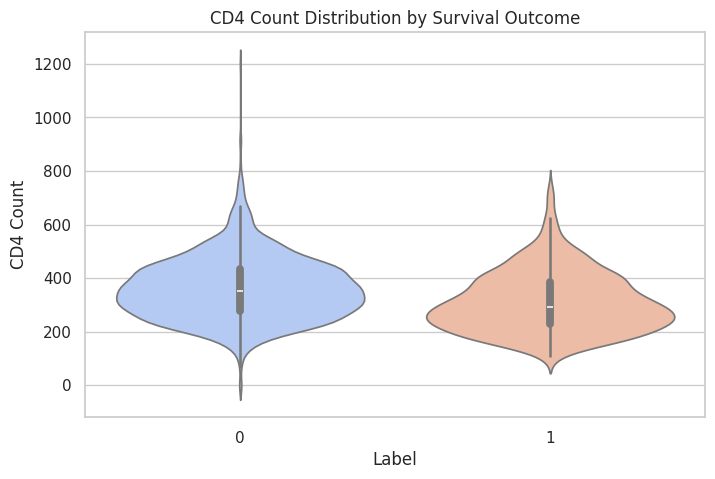

In [ ]:

plt.figure(figsize=(8,5))
sns.violinplot(x='label', y='cd40', data=df, palette='coolwarm')
plt.title("CD4 Count Distribution by Survival Outcome")
plt.xlabel("Label")
plt.ylabel("CD4 Count")
plt.show()


In [ ]:




# Apply label encoding to the validation set using the saved encoders from training
X_val_label_encoded = X_val.copy()

for col in categorical_columns:
    le = label_encoders[col]  # Use the encoder fitted during training
    X_val_label_encoded[col] = le.transform(X_val_label_encoded[col])

# Ensure the columns match between train and validation sets
X_train_encoded, X_val_encoded = X_train_label_encoded.align(X_val_label_encoded, join='left', axis=1, fill_value=0)

# 6. Train a RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# 7. Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_encoded)

# 8. Evaluate performance
from sklearn.metrics import classification_report
print("Validation set performance (Random Forest):")
print(classification_report(y_val, y_val_pred_rf))


In [ ]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the class distribution in the training set
print("Training set class distribution:")
print(y_train.value_counts())

Training set class distribution:
label
0    968
1    315
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from collections import Counter

# 1. Define categorical columns
categorical_columns = [
    'trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'zprior',
    'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt',
    'cd4_category', 'cd4_emergency'
]

# 2. Label encode categorical features
X_train_label_encoded = X_train.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X_train_label_encoded[col] = le.fit_transform(X_train_label_encoded[col])
    label_encoders[col] = le  # Save encoder if needed later

# 3. Get indices of categorical columns
categorical_indices = [X_train_label_encoded.columns.get_loc(col) for col in categorical_columns]

# 4. Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train_label_encoded, y_train)

# 5. Confirm new class distribution
print("After SMOTE-NC:", Counter(y_train_smote))


After SMOTE-NC: Counter({0: 968, 1: 968})


In [ ]:
# Apply label encoding to the validation set using the saved encoders from training
X_val_label_encoded = X_val.copy()

for col in categorical_columns:
    le = label_encoders[col]  # Use the encoder fitted during training
    X_val_label_encoded[col] = le.transform(X_val_label_encoded[col])

# Ensure the columns match between train and validation sets
X_train_encoded, X_val_encoded = X_train_label_encoded.align(X_val_label_encoded, join='left', axis=1, fill_value=0)

# 6. Train a RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# 7. Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_encoded)

# 8. Evaluate performance
from sklearn.metrics import classification_report
print("Validation set performance (Random Forest):")
print(classification_report(y_val, y_val_pred_rf))

Validation set performance (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       315
           1       0.77      0.73      0.75       113

    accuracy                           0.87       428
   macro avg       0.84      0.82      0.83       428
weighted avg       0.87      0.87      0.87       428

